# Predict Automobile Price Using Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.simplefilter("ignore")

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style = 'darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor




# Understanding The DataFrame

In [2]:
data = pd.read_excel('Data_Train.xlsx')
data.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,12.5000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,4.5000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,6.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,17.7400
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0000,4.7500
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0000,4.0000
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0000,2.9000
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0000,2.6500


In [3]:
data.shape

(6019, 12)

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0000,1.7500
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0000,12.5000
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0000,4.5000
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0000,6.0000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0000,17.7400


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [6]:
# check the null value in dataset
data.isnull().sum()

Name                 0 
Location             0 
Year                 0 
Kilometers_Driven    0 
Fuel_Type            0 
Transmission         0 
Owner_Type           0 
Mileage              2 
Engine               36
Power                36
Seats                42
Price                0 
dtype: int64

In [7]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.0000,6019.0000,5977.0000,6019.0000
mean,2013.3582,58738.3803,5.2787,9.4795
std,3.2697,91268.8432,0.8088,11.1879
min,1998.0000,171.0000,0.0000,0.4400
25%,2011.0000,34000.0000,5.0000,3.5000
50%,2014.0000,53000.0000,5.0000,5.6400
75%,2016.0000,73000.0000,5.0000,9.9500
max,2019.0000,6500000.0000,10.0000,160.0000


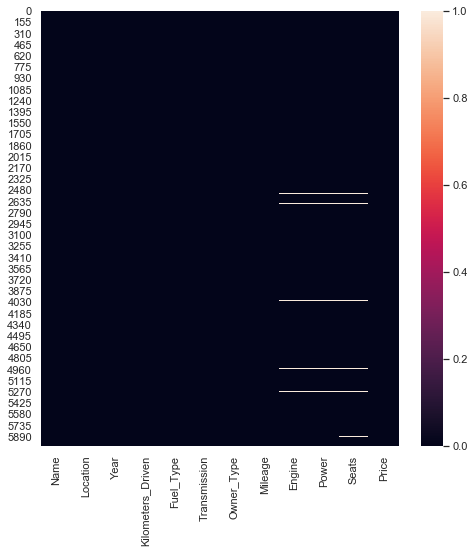

In [8]:
# null values with help of heatmap
sns.heatmap(data.isnull())

# Cleaning the Data

In [9]:
# Calculating the Missing values % contribution in DF
df_null = data.isna().mean()

df_null.sort_values(ascending = False).head()

Seats     0.0070
Power     0.0060
Engine    0.0060
Mileage   0.0003
Price     0.0000
dtype: float64

In [10]:
# replacing by mode
for column in ['Mileage', 'Engine','Power', 'Seats']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [11]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
# Datatypes
data.dtypes

Name                 object 
Location             object 
Year                 int64  
Kilometers_Driven    int64  
Fuel_Type            object 
Transmission         object 
Owner_Type           object 
Mileage              object 
Engine               object 
Power                object 
Seats                float64
Price                float64
dtype: object

(6019, 12)

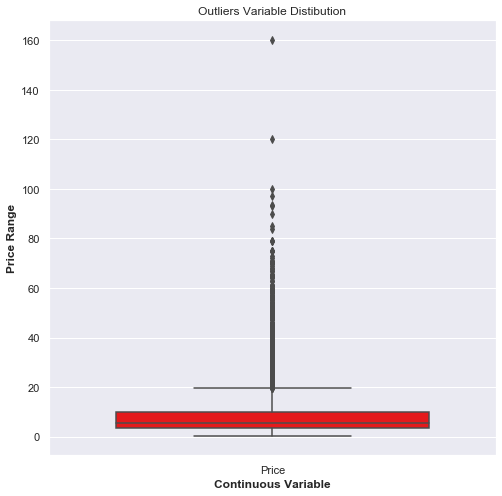

In [13]:
# outlier Analysis of target variable with maximum amount of incosistency
outliers = ['Price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data = data[outliers], orient="v", palette="Set1", whis=1.5, saturation=1, width=0.7)
plt.title("Outliers Variable Distibution")
plt.ylabel("Price Range", fontweight='bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
data.shape

In [14]:
# Extracting Car Company from CarName as per direction in problem
data['Name'] = data['Name'].str.split(' ', expand = True)

In [15]:
data['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini'], dtype=object)

Type error in Car comany name

<b>ISUZU = Isuzu<b>

In [16]:
# renamning the type error in car comapny names
data['Name'] = data['Name'].replace({'ISUZU' : 'Isuzu'})

In [17]:
data['Name'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley', 'Lamborghini'],
      dtype=object)

In [18]:
# Changing the datatype of Symboling as it is categorical as per dictionary file
data['Owner_Type'] = data['Owner_Type'].astype(str)

In [19]:
data.loc[data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2940,Maruti,Kolkata,2016,29000,Diesel,Manual,First,27.39 kmpl,1248 CC,74 bhp,5.0000,6.5000
4781,Maruti,Hyderabad,2007,52195,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0000,1.7500


In [20]:
# Segregation of numerical & categorical values
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols = set(cols) - set(num_cols)

# Visualising the Data

Text(0, 0.5, 'Count of Cars')

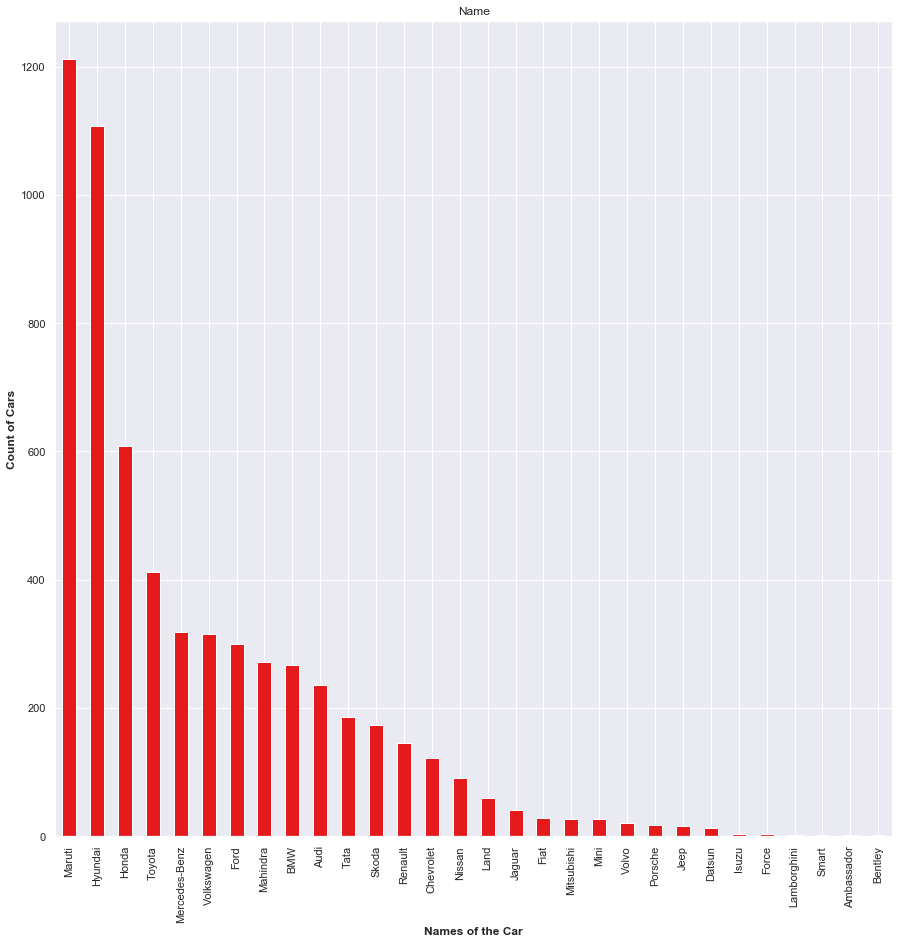

In [21]:
plt.rcParams['figure.figsize'] = [15,15]
ax = data['Name'].value_counts().plot(kind='bar', stacked = True, colormap='Set1')
ax.title.set_text('Name')
plt.xlabel("Names of the Car", fontweight = 'bold')
plt.ylabel("Count of Cars", fontweight = 'bold')

<b>Insights : <b>
    Maruti seems to be most favorite car----
    Ambesador seems to be least favorite car

# Visualising the distibution of Car prices

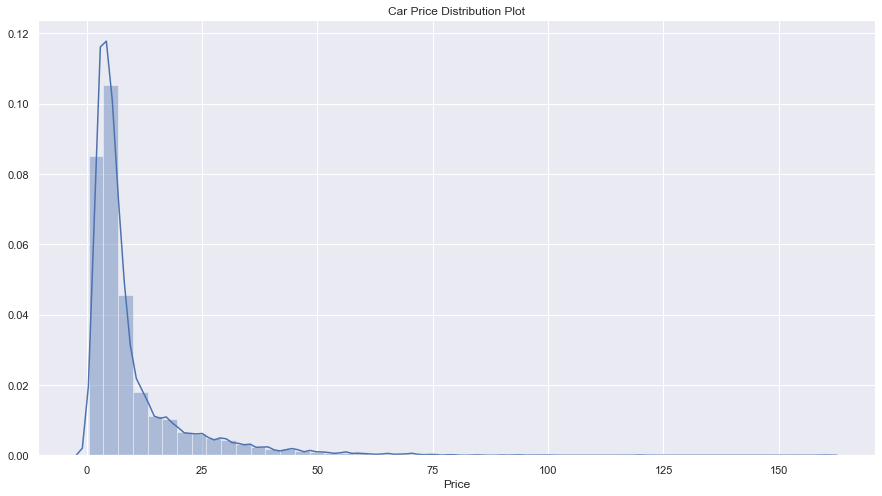

In [22]:
plt.figure(figsize = [15,8])

plt.title('Car Price Distribution Plot')
sns.distplot(data['Price'])

The plot seems to be right screwed, the prices of slmost all cars looks like less than 25

# Visualising Numeric Variables 
Pairplot of the numeric variable

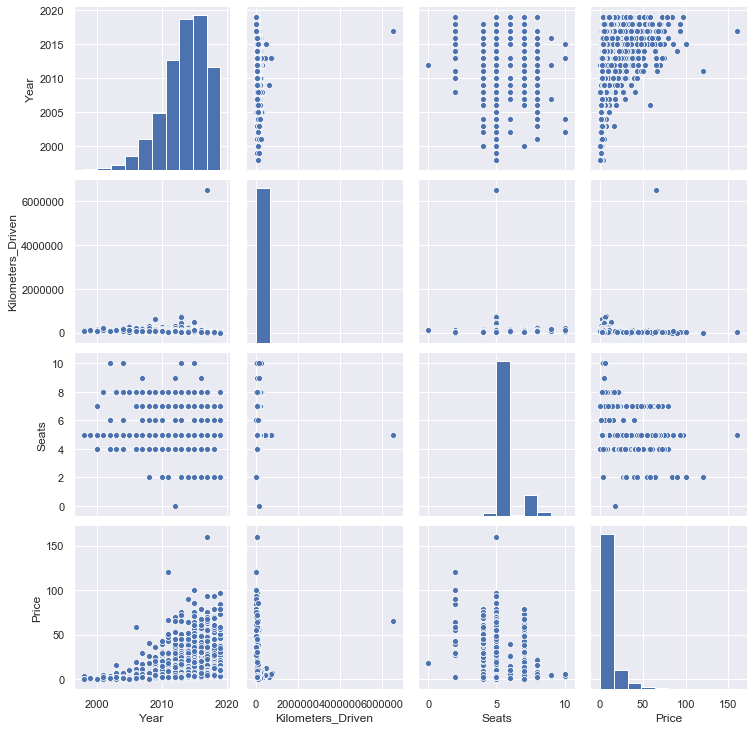

In [23]:
ax = sns.pairplot(data[num_cols])

# Visualising few more Categorical Variables
<b> Boxplot of all the categorical variables </b>

In [24]:
data[cat_cols]

,Fuel_Type,Owner_Type,Mileage,Transmission,Engine,Location,Power,Name
0,CNG,First,26.6 km/kg,Manual,998 CC,Mumbai,58.16 bhp,Maruti
1,Diesel,First,19.67 kmpl,Manual,1582 CC,Pune,126.2 bhp,Hyundai
2,Petrol,First,18.2 kmpl,Manual,1199 CC,Chennai,88.7 bhp,Honda
3,Diesel,First,20.77 kmpl,Manual,1248 CC,Chennai,88.76 bhp,Maruti
4,Diesel,Second,15.2 kmpl,Automatic,1968 CC,Coimbatore,140.8 bhp,Audi
...,...,...,...,...,...,...,...,...
6014,Diesel,First,28.4 kmpl,Manual,1248 CC,Delhi,74 bhp,Maruti
6015,Diesel,First,24.4 kmpl,Manual,1120 CC,Jaipur,71 bhp,Hyundai
6016,Diesel,Second,14.0 kmpl,Manual,2498 CC,Jaipur,112 bhp,Mahindra
6017,Petrol,First,18.9 kmpl,Manual,998 CC,Kolkata,67.1 bhp,Maruti


[Text(0, 0.5, 'Frequency of seat no.'), Text(0.5, 0, 'Sear no,')]

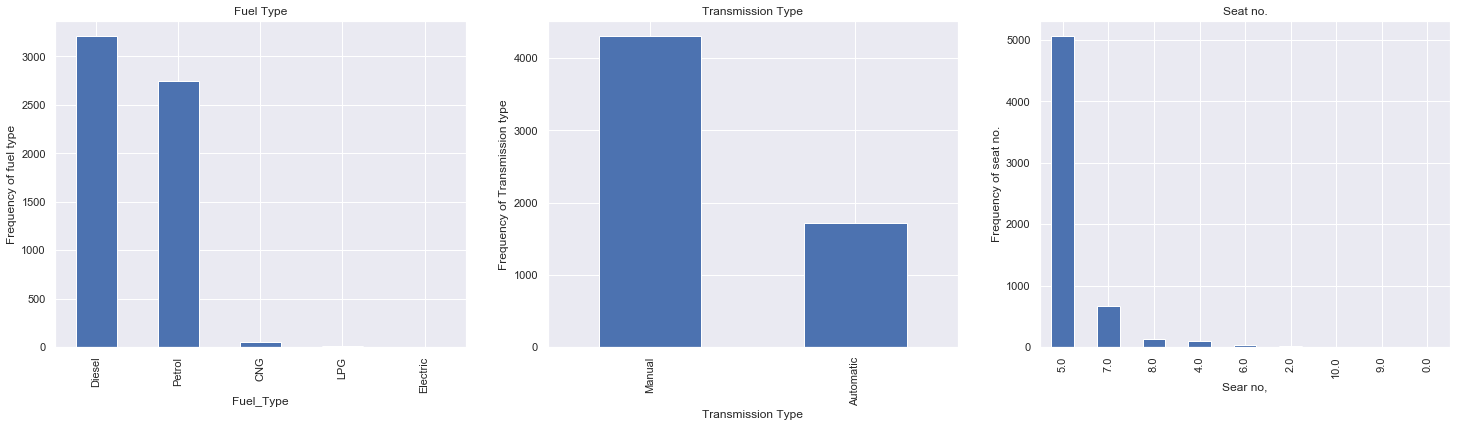

In [25]:
plt.figure(figsize = (25,6))

plt.subplot(1,3,1)
plt1 = data['Fuel_Type'].value_counts().plot(kind = 'bar')
plt.title("Fuel Type")
plt1.set(xlabel ="Fuel_Type", ylabel = "Frequency of fuel type")

plt.subplot(1,3,2)
plt2 = data['Transmission'].value_counts().plot(kind = 'bar')
plt.title("Transmission Type")
plt2.set(xlabel = "Transmission Type", ylabel = "Frequency of Transmission type")

plt.subplot(1,3,3)
plt3 = data['Seats'].value_counts().plot(kind = 'bar')
plt.title("Seat no.")
plt3.set(xlabel = "Sear no,", ylabel = "Frequency of seat no.")

# Derived Metrices
Average Price

<Figure size 1440x432 with 0 Axes>

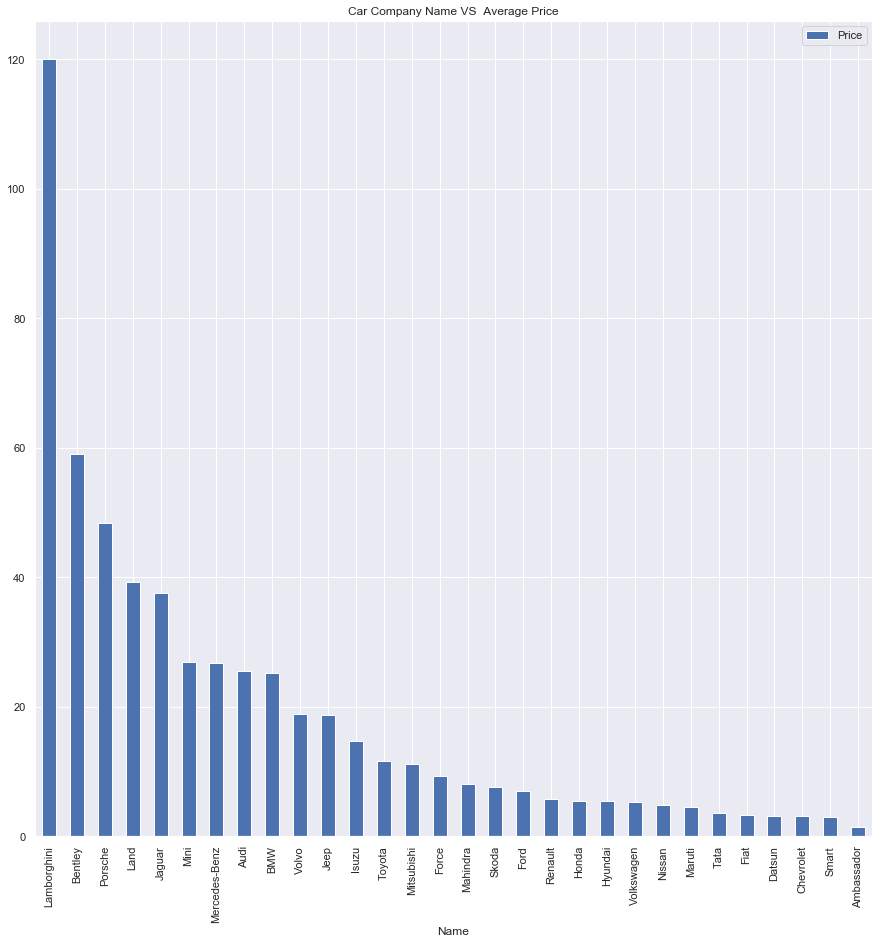

In [26]:
plt.figure(figsize=(20,6))
df_autox = pd.DataFrame(data.groupby(['Name'])['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name VS  Average Price')
plt.show()

Insights:
Lamborghini seems to have the highest average price

<Figure size 1440x432 with 0 Axes>

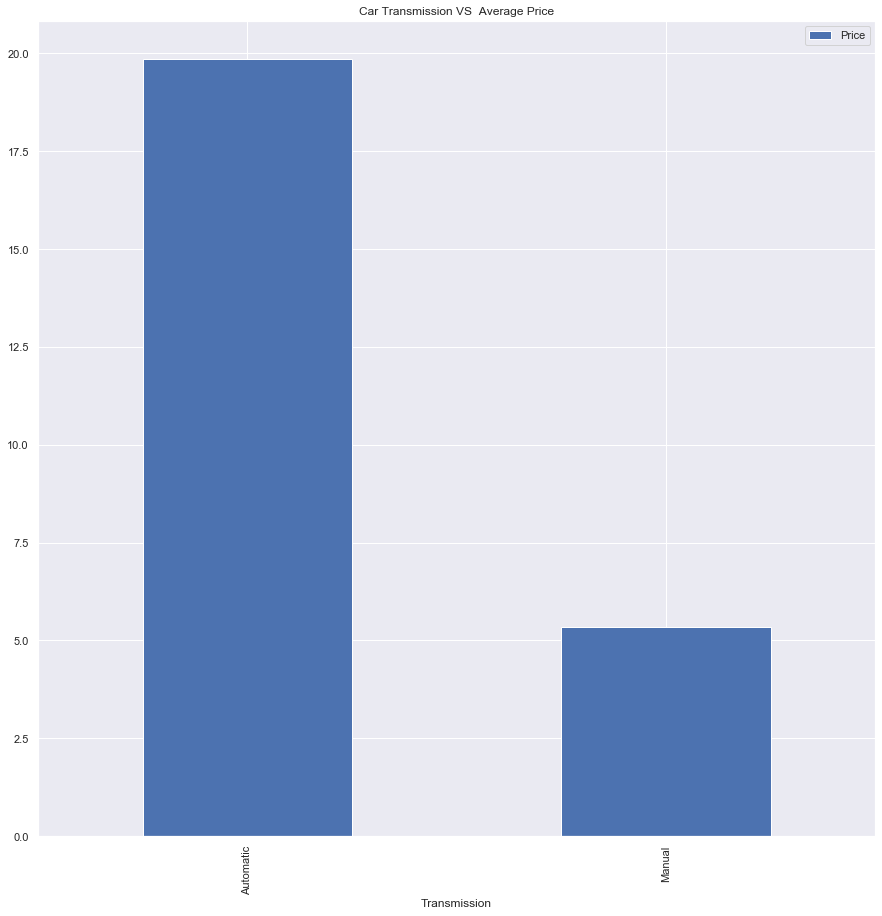

In [27]:
plt.figure(figsize=(20,6))
df_autox = pd.DataFrame(data.groupby(['Transmission'])['Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Transmission VS  Average Price')
plt.show()

Automatics seems to have highest average price

In [28]:
# Binning the Car Company Based on avg prices of each car Company

data['Power'] = data['Power'].str.rstrip('bhpnull')
data['Mileage'] = data['Mileage'].str.rstrip('km/kgpl')
data['Engine'] = data['Engine'].str.rstrip('C')
data['Power'] = data['Power'].str.replace('null', '0')
data.dropna()


data['Price'] = data['Price'].astype('int')
df_auto_temp = data.copy()
t = df_auto_temp.groupby(['Name'])['Price'].mean()
df_auto_temp = df_auto_temp.merge(t.reset_index(), how='left', on='Name')
bins = [0, 7, 15, 30]
label = ['Budget_Friendly', 'Medium range', 'TopNotch_Cars']
data['Cars_Category'] = pd.cut(df_auto_temp['Price_y'], bins, right=False, labels=label)
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0000,1,Budget_Friendly
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0000,12,Budget_Friendly
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0000,4,Budget_Friendly
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0000,6,Budget_Friendly
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0000,17,TopNotch_Cars


In [29]:
#sig_col = ['Cars_Category', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [30]:
#data = data[sig_col]

# Data preparation

In [31]:
# Creating dummy variables
sig_cat_col = ['Cars_Category', 'Transmission'] 

In [32]:
dummies = pd.get_dummies(data[sig_cat_col]) 
dummies.shape

(6019, 5)

In [33]:
dummies = pd.get_dummies(data[sig_cat_col], drop_first = False)
dummies.shape

(6019, 5)

In [34]:
data = pd.concat([data, dummies], axis = 1)

In [35]:
data.drop(sig_cat_col, axis=1, inplace = True)
data.shape

(6019, 16)

# Data for train and test

In [36]:
data_train = data

In [37]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category_Budget_Friendly,Cars_Category_Medium range,Cars_Category_TopNotch_Cars,Transmission_Automatic,Transmission_Manual
0,Maruti,Mumbai,2010,72000,CNG,First,26.6,998,58.16,5.0000,1,1,0,0,0,1
1,Hyundai,Pune,2015,41000,Diesel,First,19.67,1582,126.2,5.0000,12,1,0,0,0,1
2,Honda,Chennai,2011,46000,Petrol,First,18.2,1199,88.7,5.0000,4,1,0,0,0,1
3,Maruti,Chennai,2012,87000,Diesel,First,20.77,1248,88.76,7.0000,6,1,0,0,0,1
4,Audi,Coimbatore,2013,40670,Diesel,Second,15.2,1968,140.8,5.0000,17,0,0,1,1,0


# Rescaling features

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
sig_num_col = ['Mileage', 'Engine', 'Seats', 'Kilometers_Driven', 'Year','Power']

In [40]:
data_train[sig_num_col] = scaler.fit_transform(data_train[sig_num_col])
data_train.dropna()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category_Budget_Friendly,Cars_Category_Medium range,Cars_Category_TopNotch_Cars,Transmission_Automatic,Transmission_Manual
0,Maruti,Mumbai,-1.0271,0.1453,CNG,First,1.8479,-1.0339,-0.9545,-0.3433,1,1,0,0,0,1
1,Hyundai,Pune,0.5022,-0.1944,Diesel,First,0.3352,-0.0612,0.2745,-0.3433,12,1,0,0,0,1
2,Honda,Chennai,-0.7213,-0.1396,Petrol,First,0.0143,-0.6991,-0.4029,-0.3433,4,1,0,0,0,1
3,Maruti,Chennai,-0.4154,0.3097,Diesel,First,0.5753,-0.6175,-0.4018,2.1372,6,1,0,0,0,1
4,Audi,Coimbatore,-0.1096,-0.1980,Diesel,Second,-0.6406,0.5817,0.5382,-0.3433,17,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,0.1963,-0.3438,Diesel,First,2.2408,-0.6175,-0.6684,-0.3433,4,1,0,0,0,1
6015,Hyundai,Jaipur,0.5022,0.4521,Diesel,First,1.3676,-0.8307,-0.7226,-0.3433,4,1,0,0,0,1
6016,Mahindra,Jaipur,-0.4154,-0.0410,Diesel,Second,-0.9025,1.4645,0.0180,3.3775,2,0,1,0,0,1
6017,Maruti,Kolkata,-0.1096,-0.1396,Petrol,First,0.1671,-1.0339,-0.7930,-0.3433,2,1,0,0,0,1


In [41]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars_Category_Budget_Friendly,Cars_Category_Medium range,Cars_Category_TopNotch_Cars,Transmission_Automatic,Transmission_Manual
0,Maruti,Mumbai,-1.0271,0.1453,CNG,First,1.8479,-1.0339,-0.9545,-0.3433,1,1,0,0,0,1
1,Hyundai,Pune,0.5022,-0.1944,Diesel,First,0.3352,-0.0612,0.2745,-0.3433,12,1,0,0,0,1
2,Honda,Chennai,-0.7213,-0.1396,Petrol,First,0.0143,-0.6991,-0.4029,-0.3433,4,1,0,0,0,1
3,Maruti,Chennai,-0.4154,0.3097,Diesel,First,0.5753,-0.6175,-0.4018,2.1372,6,1,0,0,0,1
4,Audi,Coimbatore,-0.1096,-0.1980,Diesel,Second,-0.6406,0.5817,0.5382,-0.3433,17,0,0,1,1,0


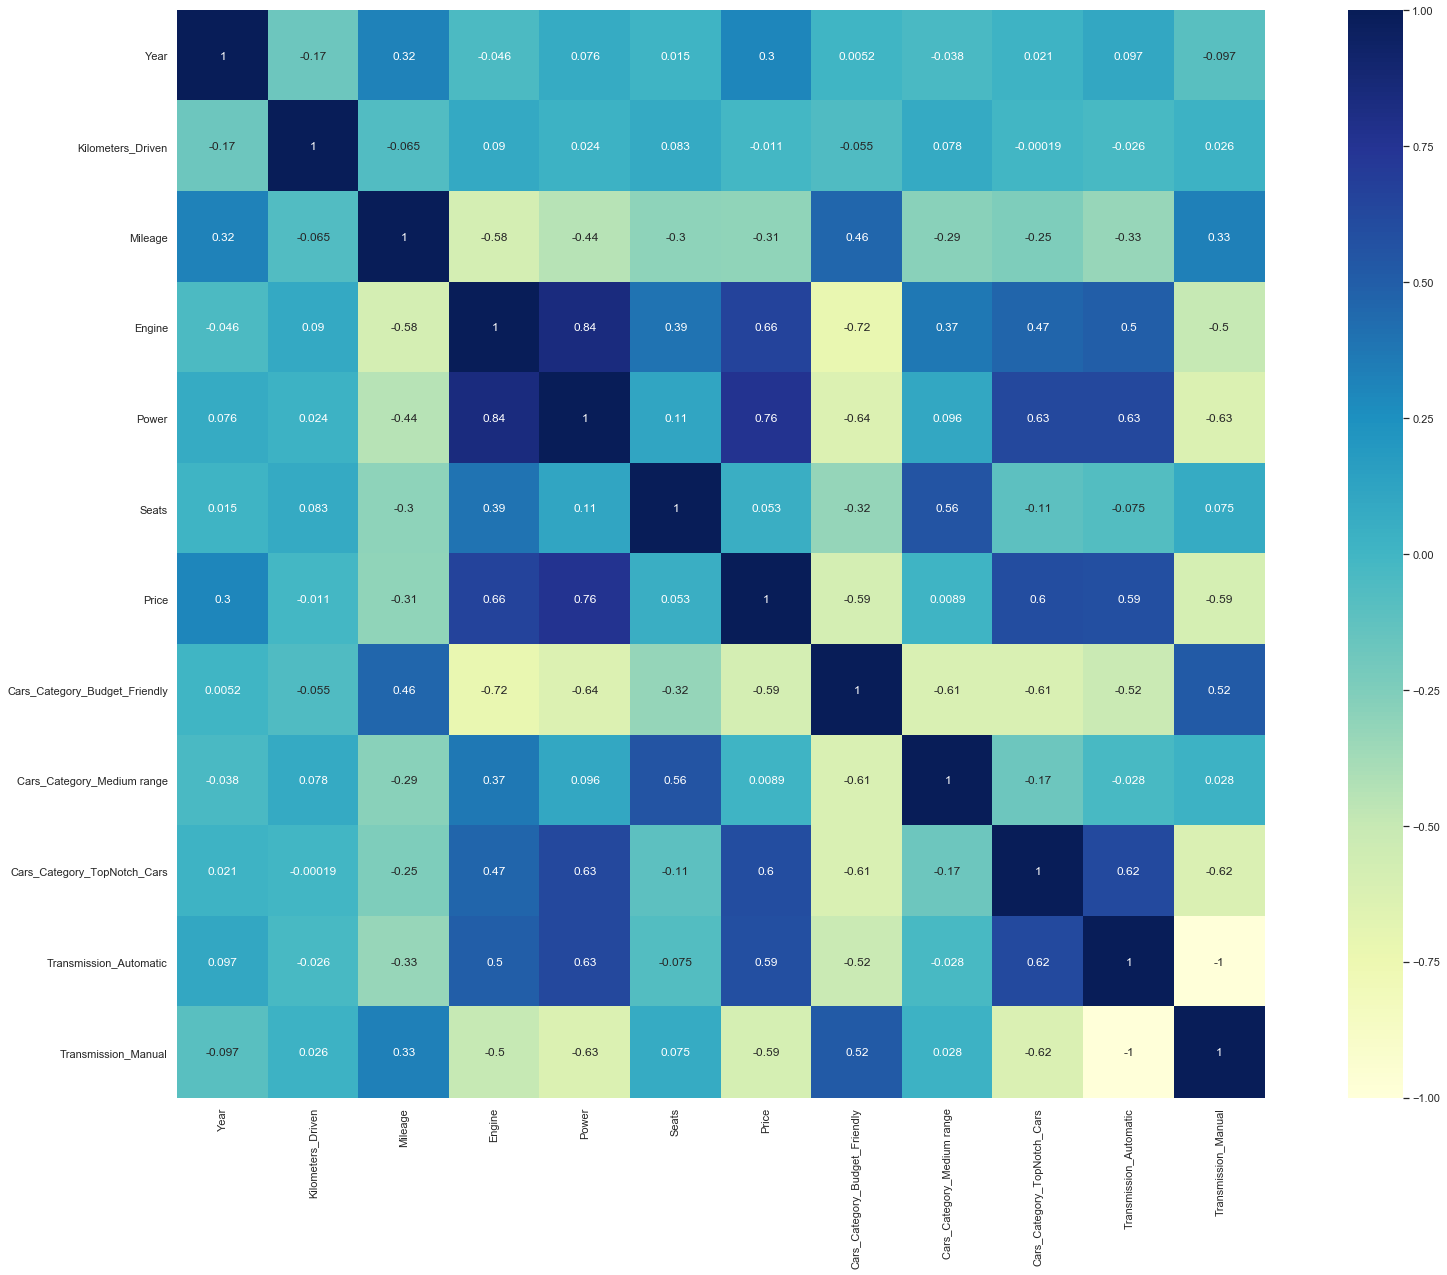

In [42]:
# lets check the correlation coefficient to see which variable are highly correlated
plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(), square = True, annot = True, cmap = "YlGnBu")
plt.show()

Let's see scattarplot for few correlated varicable vs price

In [43]:
col = ['Mileage', 'Engine', 'Kilometers_Driven', 'Year','Power']

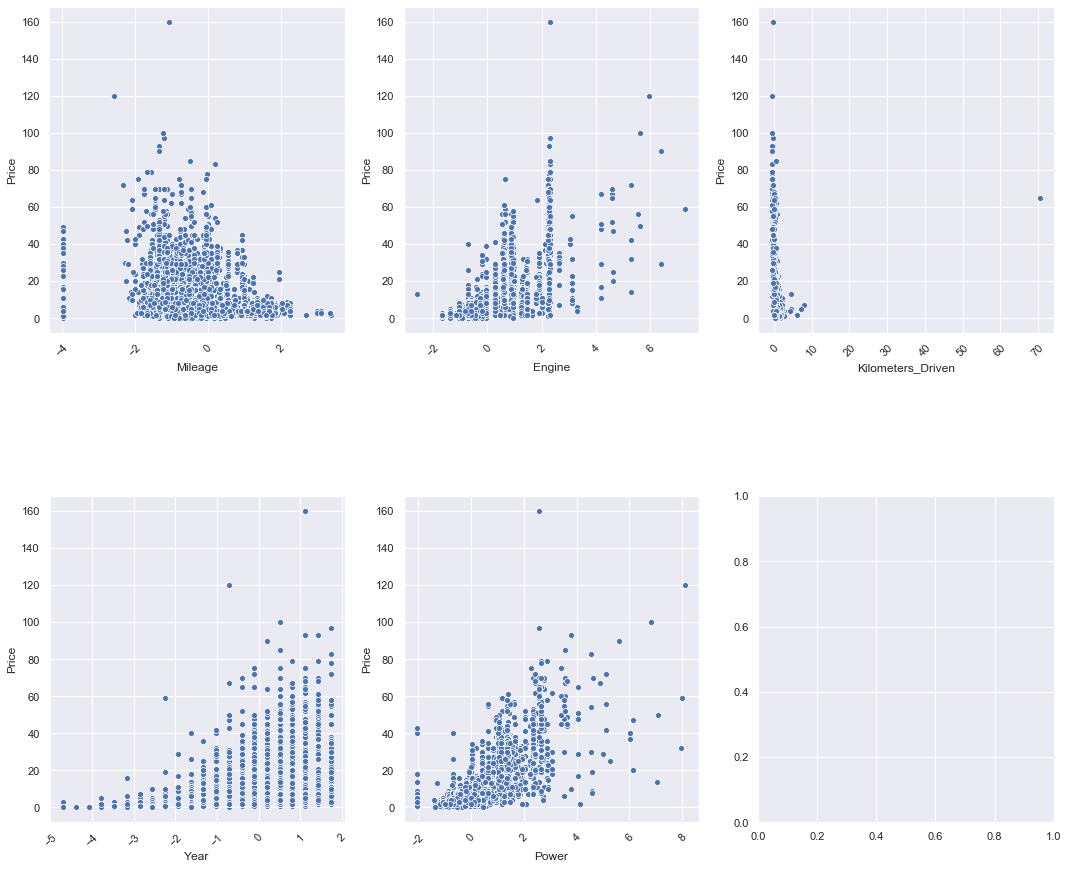

In [44]:
# Scatter plpot of Independent variables Vs Dependent variables

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    an = sns.scatterplot(x=col, y='Price', data=data, ax = axes[x,y])
    plt.setp(an.get_xticklabels(), rotation = 45)
plt.subplots_adjust(hspace = 0.5)

<b><h4>Dividing int X and Y sets for the model building</h4></b>

In [45]:
y_train = data_train.pop('Price')
X_train = data_train

# Builing a Linear Model

In [46]:
X_train_1 = X_train['Mileage']

In [47]:
# Add a constant created
X_train_1c = sm.add_constant(X_train_1)

In [48]:
# Creat a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [49]:
# Check Parameters created

lr_1.params

const     9.0061 
Mileage   -3.4507
dtype: float64

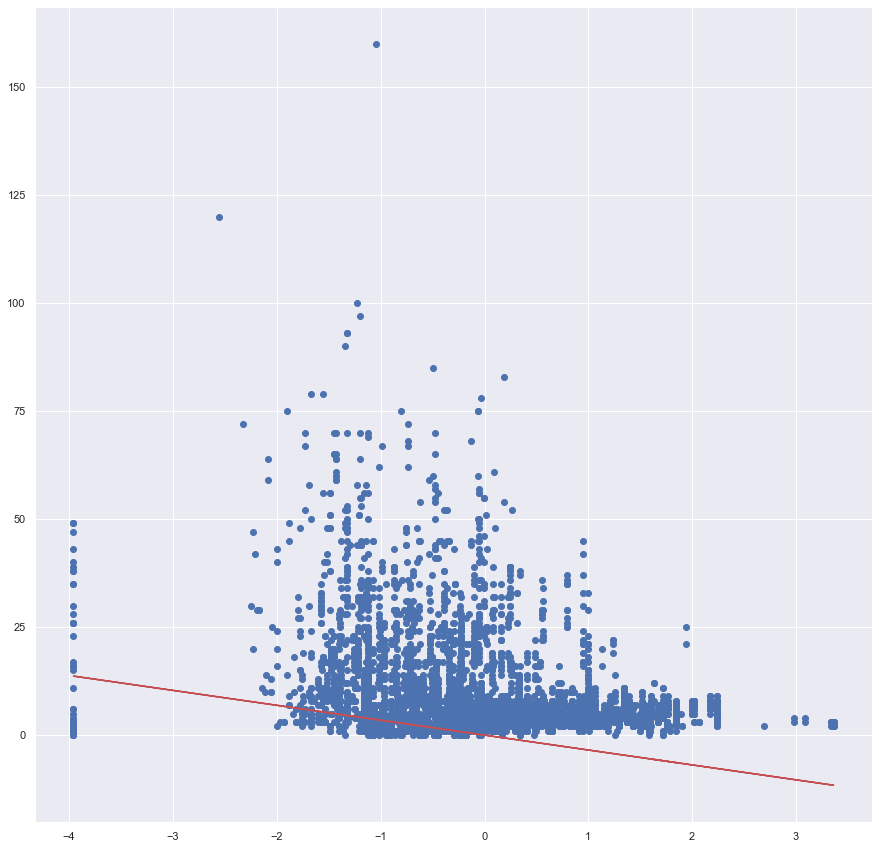

In [50]:
# Let's Visualise the data with scatter plot and fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], -3.4507*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [51]:
# Print a Summary of the Linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     627.6
Date:                Tue, 09 Jun 2020   Prob (F-statistic):          7.91e-132
Time:                        13:46:31   Log-Likelihood:                -22799.
No. Observations:                6019   AIC:                         4.560e+04
Df Residuals:                    6017   BIC:                         4.561e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0061      0.138     65.383      0.0

In [52]:
X_train_2 = X_train[['Mileage', 'Engine']]

In [53]:
X_train_2c = sm.add_constant(X_train_2)

In [54]:
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [55]:
lr_2.params

const     9.0061
Mileage   1.2703
Engine    8.1229
dtype: float64

In [56]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     2373.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -21347.
No. Observations:                6019   AIC:                         4.270e+04
Df Residuals:                    6016   BIC:                         4.272e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0061      0.108     83.212      0.0

In [57]:
X_train_3  = X_train[['Mileage', 'Engine', 'Seats', 'Kilometers_Driven','Year','Power']]

In [58]:
X_train_3c = sm.add_constant(X_train_3)

In [59]:
lr_3  = sm.OLS(y_train, X_train_3c).fit()

In [60]:
lr_3.params

const               9.0061 
Mileage             -0.8477
Engine              2.9655 
Seats               -1.5017
Kilometers_Driven   0.1458 
Year                3.4526 
Power               5.5438 
dtype: float64

In [61]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -19874.
No. Observations:                6019   AIC:                         3.976e+04
Df Residuals:                    6012   BIC:                         3.981e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0061      0.08

# RFE

In [62]:
# Running RFE with the output number of the variable equal to 20
X_train = X_train.drop('Name', axis = 1)
X_train = X_train.drop('Location', axis = 1)
X_train = X_train.drop('Owner_Type', axis = 1)
X_train = X_train.drop('Fuel_Type', axis = 1)

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 50)
rfe = rfe.fit(X_train, y_train)

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Kilometers_Driven', True, 1),
 ('Mileage', True, 1),
 ('Engine', True, 1),
 ('Power', True, 1),
 ('Seats', True, 1),
 ('Cars_Category_Budget_Friendly', True, 1),
 ('Cars_Category_Medium range', True, 1),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('Transmission_Automatic', True, 1),
 ('Transmission_Manual', True, 1)]

In [64]:
# selecting variable which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Cars_Category_Budget_Friendly', 'Cars_Category_Medium range',
       'Cars_Category_TopNotch_Cars', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [65]:
X_train_rfe = X_train[col_sup]

 # high p value high VIF : drop
 # hight p value low vif or low p value high vif : drop
 # low p value low vif :accepted

In [66]:
# adding a constant variable and build a first fitted model
import statsmodels.api as sm
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

# Summary of Linear Model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -18959.
No. Observations:                6019   AIC:                         3.794e+04
Df Residuals:                    6008   BIC:                         3.801e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

# Checking VIF

In [67]:
# Creat DataFrame that will contaim the names of all the features variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,Transmission_Manual,47.0400
9,Transmission_Automatic,18.0500
6,Cars_Category_Budget_Friendly,15.1200
7,Cars_Category_Medium range,9.0900
8,Cars_Category_TopNotch_Cars,7.3300
3,Engine,6.5600
4,Power,5.9500
2,Mileage,1.8400
5,Seats,1.8200
0,Year,1.3000


# Dropping the variable and updating model

In [68]:
# dropping highly correlated and insignificant variables

X_train_rfe1 = X_train_rfe.drop('Transmission_Manual', 1,)

# Adding a constanr variable and Build a second fitted model
X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()


# Summary
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1775.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -18959.
No. Observations:                6019   AIC:                         3.794e+04
Df Residuals:                    6008   BIC:                         3.801e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [69]:
# dropping highly correlated and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('Cars_Category_Budget_Friendly', 1,)

# Adding a constanr variable and Build a second fitted model
X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()


# Summary
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1499.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -19555.
No. Observations:                6019   AIC:                         3.913e+04
Df Residuals:                    6009   BIC:                         3.920e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [70]:
# dropping highly correlated and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('Cars_Category_TopNotch_Cars', 1,)

# Adding a constanr variable and Build a second fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()


# Summary
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     1571.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -19701.
No. Observations:                6019   AIC:                         3.942e+04
Df Residuals:                    6010   BIC:                         3.948e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [71]:
# dropping highly correlated and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('Cars_Category_Medium range', 1,)

# Adding a constanr variable and Build a second fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()


# Summary
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     1729.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -19777.
No. Observations:                6019   AIC:                         3.957e+04
Df Residuals:                    6011   BIC:                         3.962e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

In [72]:
# dropping highly correlated and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('Transmission_Automatic', 1,)

# Adding a constanr variable and Build a second fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()


# Summary
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     1922.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:46:31   Log-Likelihood:                -19874.
No. Observations:                6019   AIC:                         3.976e+04
Df Residuals:                    6012   BIC:                         3.981e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.0061      0.08

# Model 1 

In [73]:
# Predicting the price of trainng set
y_train_Price = lm_rfe5.predict(X_train_rfe5c)

Text(0.5, 0, 'Error')

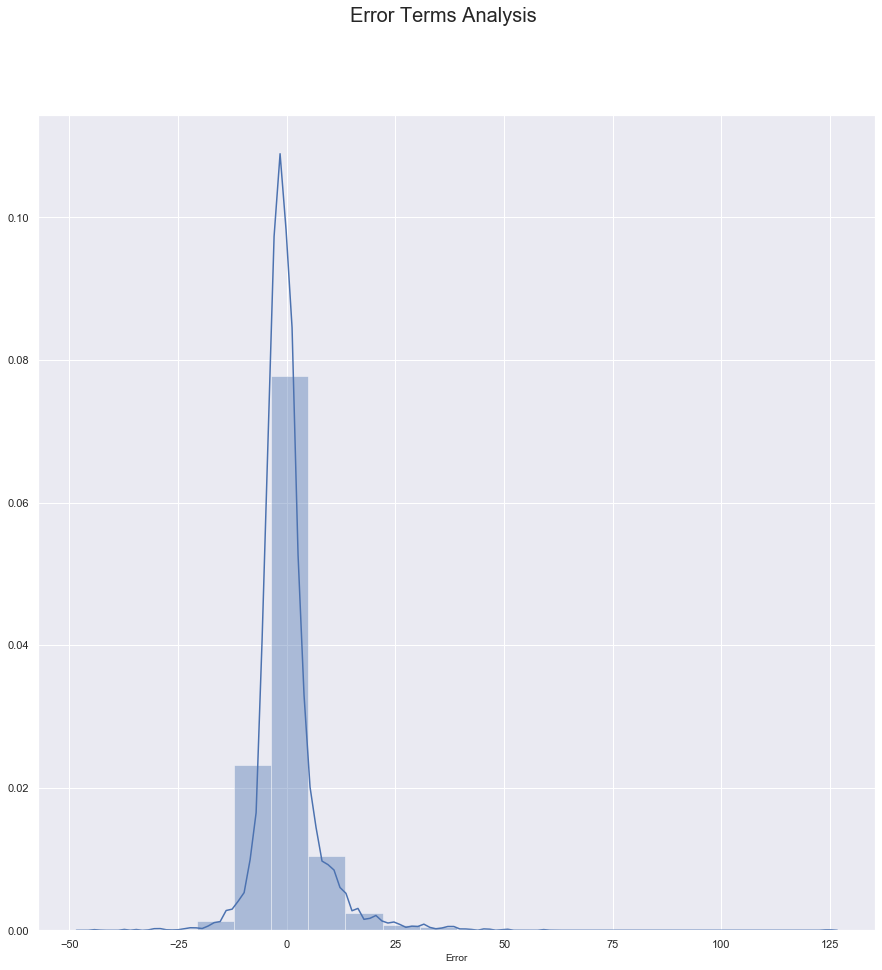

In [74]:
fig = plt.figure()
sns.distplot((y_train - y_train_Price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)
plt.xlabel('Error', fontsize = 10)

# Making prediction using final model

In [75]:
data_test = pd.read_excel('Data_Test.xlsx')
data_test['Power'] = data_test['Power'].str.replace('null', '0')

In [76]:
for column in ['Mileage', 'Engine','Power', 'Seats']:
    data_test[column].fillna(data_test[column].mode()[0], inplace=True)

In [77]:
data_test['Mileage'] = data_test['Mileage'].str.rstrip('kg/kmpl')
data_test['Power'] = data_test['Power'].str.rstrip('bhpnull')
data_test['Engine'] = data_test['Engine'].str.rstrip('C')

In [78]:
data_test[sig_num_col] = scaler.transform(data_test[sig_num_col])
data_test.shape

(1234, 11)

In [79]:
X_test = data_test

In [80]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe5c.columns]

In [81]:
y_pred = lm_rfe5.predict(X_test_new)